# VIMS Cube Visual Interface

## VCVI Doesn't Roll off the Tongue...

This notebook has a simple purpose: reading csv files made from Jcubes and printing out the results. Much of this code was originally created to examine simulation results, but we can used it to examine any cube in theory. One of the goals is to make it so we can view a cube in color with ease. So without further ado... please insert the file to be used.

WARNING: animations exist in this notebook! remember to shut them down before running cells from the top or you might end up with problems! (If you break it, don't worry, resetting the notebook should just do it). 

In [1]:
# COLLECTED CUBES
tester = r"C:\Users\deran\Desktop\CubeCSVDatabase\T114\CM_1826052615_1.cub.csv" #Good Default Test, global view
ontario = r"C:\Users\deran\Desktop\CubeCSVDatabase\T38\CM_1575506843_1.cub.csv" #Ontario Laucus
specular = r"C:\Users\deran\Desktop\CubeCSVDatabase\T85\CM_1721848119_1.cub.csv" #Specular Point
darkOval = r"C:\Users\deran\Desktop\CubeCSVDatabase\T35\CM_1567239055_1.cub.csv" #the mysterious dark oval
sionascaig = r"C:\Users\deran\Desktop\CubeCSVDatabase\T66\CM_1643411453_1.cub.csv" #temperate lake?
selk = r"C:\Users\deran\Desktop\CubeCSVDatabase\T40\CM_1578263500_1.cub.csv" #Crater!
sedi = r"C:\Users\deran\Desktop\CubeCSVDatabase\T69\CM_1654399736_1.cub.csv" #sediment?

import csv
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
import mpl_interactions.ipyplot as iplt
import matplotlib.image as mpimg

In [2]:
%matplotlib notebook

#File insertion goes here.
#Make sure to put the entire file path here. 
#You do not need to specify the axes file, it can be found automatically from this one.

filepath = tester #use the name of the cube you want in the above cell.

#Now we extract the axes file as well...

axesfp = filepath.removesuffix(".csv") + ".axes.csv"

# Skeleton code nabbed from https://realpython.com/python-csv/



#Step 1: use the axes to determine the size of what we're dealing with.

xAxis = []
yAxis = []
zAxis = []

with open(axesfp) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        i = 0
        L = len(row)
        while (i < L-1):
            if (line_count == 0):
                xAxis.append(row[i])
            elif (line_count == 1):
                yAxis.append(row[i])
            elif (line_count == 2):
                zAxis.append(row[i])
            i = i+1
        line_count += 1

#We now have an x, y, and z axis. x and y axes are just ordinal, but the z axis contains wavelength in microns.
#The lengths of these arrays tell us how to extract the data.

dataStorage = [[[0 for x in range(len(zAxis))] for x in range(len(yAxis))] for x in range(len(xAxis))] 

#The above holds the data of the cube itself. 

with open(filepath) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < len(xAxis)):
            dataStorage[i][j][k] = float(row[i])
            if (math.isnan(dataStorage[i][j][k])):
                dataStorage[i][j][k] = 0 #We set nans to zero to allow plotting to take place, careful!
            elif (dataStorage[i][j][k] < 0):
                dataStorage[i][j][k] = 0 #Negative values are nonsense.
            elif (dataStorage[i][j][k] > 1):
                dataStorage[i][j][k] = 1 #Make saturation obvious? Keep it from overloading. 
            i = i + 1
        i = 0
        j = j + 1
        if (j >= len(yAxis)):
            j = 0
            k = k + 1
        line_count += 1

#The data is now read in.
#all future programs in this notebook should be able to access xAxis, yAxis, zAxis and dataStorage.
#dataStorage is stored in xyz order, that is x, y, and wavelength. 

#helpful declarations
#Wavelength of windows in microns (um)
windowum = [0.933078, 1.08183, 1.27813, 1.59018, 2.01781, 2.69620, 2.79889, 5.00576]
#Now we need to dynamically find the indeces where this is true. 
windowInd = [0,0,0,0,0,0,0,0]
i = 0
while (i < 8):
    j = 0
    while (j < len(zAxis)):
        if (float(zAxis[j]) < windowum[i] and float(zAxis[j+1]) > windowum[i]):
            if (windowum[i] - float(zAxis[j]) < float(zAxis[j+1]) - windowum[i]):
                windowInd[i] = j
                #Have to make sure we pick the closest point, not just the "lower" one.
            else:
                windowInd[i] = j+1
            j = len(zAxis)
        j = j + 1
    i = i+1
print(windowInd)
    
def indexFromWav(wav):
    index = 0
    j = 0
    while (j < len(zAxis)):
        if (float(zAxis[j]) < wav and float(zAxis[j+1]) > wav):
            if (wav - float(zAxis[j]) < float(zAxis[j+1]) - wav):
                index = j
                #Have to make sure we pick the closest point, not just the "lower" one.
            else:
                index = j+1
            j = len(zAxis)
        j = j + 1    
    return index
    
#image dimensions are fungible. Calculate them.  
xDim = 0
yDim = 0
if (len(xAxis) > len(yAxis)):
    yDim = 9 
    xDim = 9/(len(xAxis)/len(yAxis))
else:
    xDim = 9
    yDim = 9/(len(yAxis)/len(xAxis))
#This may seem backward, but transpositions occur so...

    
print(np.amax(dataStorage))
print(np.amin(dataStorage))

[79, 107, 119, 138, 164, 205, 212, 343]
0.290928
0.0


In [3]:
#Little code block for printing things if I want to without reading the whole file again.

#0.933078, 1.08183, 1.27813, 1.59018, 2.01781, 2.69620, 2.79889, 5.00576

#0.08928, 0.90909, 0.72973 (The "bestcolor" options for my algorithm, RGB, from .1 .2 .3)

# for later: https://iopscience.iop.org/article/10.3847/PSJ/aba191/meta

# T94 is missing. Would have been nice too, since it included https://link.springer.com/article/10.1186/s13535-014-0003-4

# thingy https://www.sciencedirect.com/science/article/pii/S0032063309001287 lots of globes.

## Single Image Viewer

### If you only want to look at one very specific slice



<IPython.core.display.Javascript object>


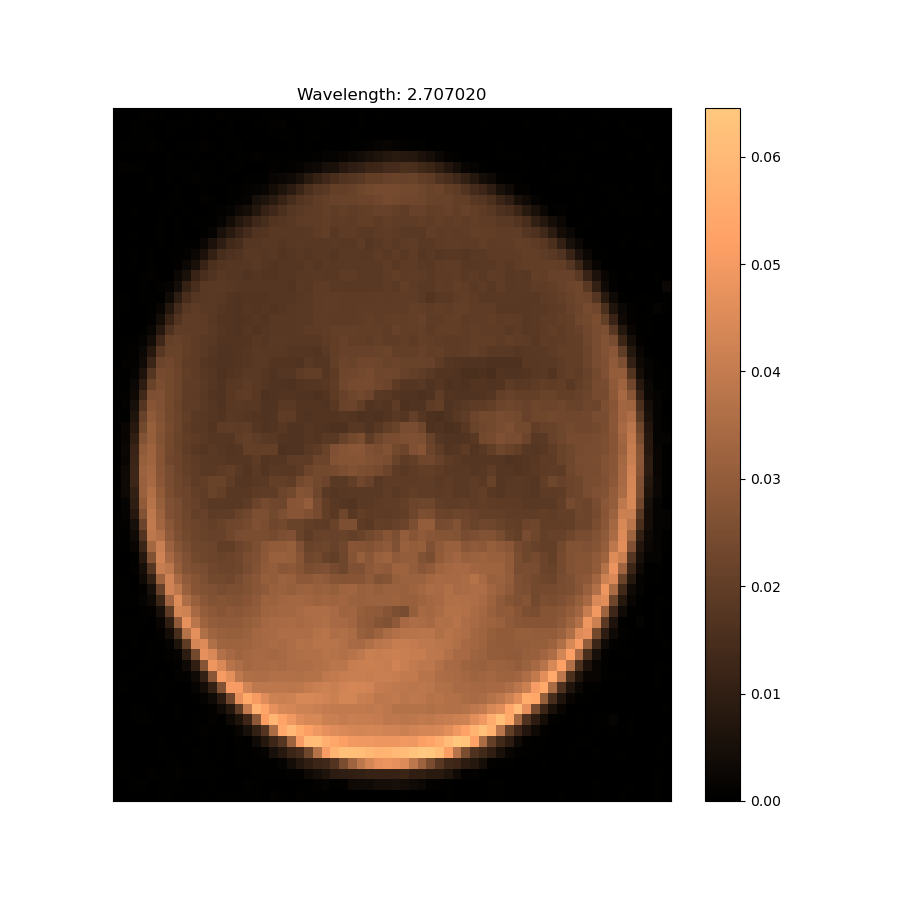

In [4]:
index = 206
#The wavelength we want to use. Indices up to 351 are allowed. 0 is allowed.

fig, ax = plt.subplots(figsize = (xDim,yDim))

#Data storage is a 3D array in the wrong order, we need to get a 2D one out of it.
temp = np.transpose(dataStorage) #xyz to zyx
dataShaped = np.transpose(temp[index]) #zyx to yx to xy

image = ax.pcolormesh(dataShaped, cmap="copper")
fig.colorbar(image,ax=ax)
ax.set(xticks=[], yticks=[], title = 'Wavelength: ' + str(zAxis[index])) #Remove ticks.


plt.show()

## Image Viewer: Log Mode

### Exactly what it says on the tin.

<IPython.core.display.Javascript object>


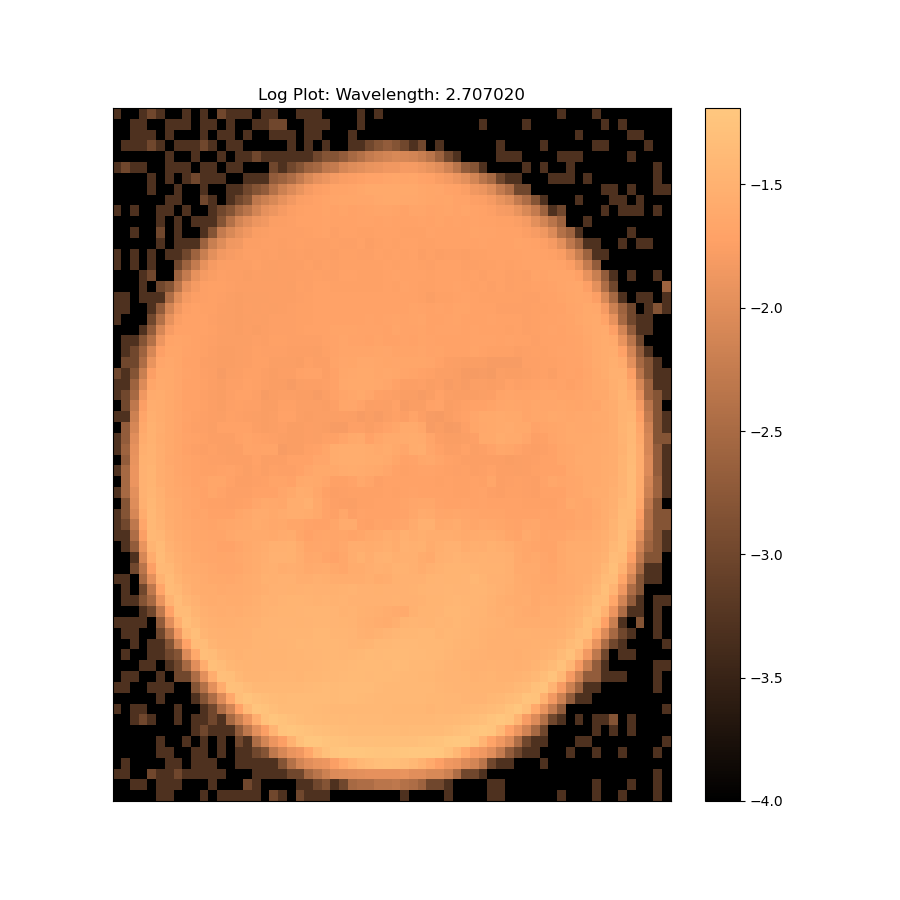

C:\Users\deran\AppData\Local\Temp\ipykernel_6004\3876660589.py:8: RuntimeWarning: divide by zero encountered in log10
  dataShaped = np.log10(np.transpose(temp[index])) #zyx to yx to xy


In [5]:
index = 206
#The wavelength we want to use. Indices up to 351 are allowed. 0 is allowed.

fig, ax = plt.subplots(figsize = (xDim,yDim))

#Data storage is a 3D array in the wrong order, we need to get a 2D one out of it.
temp = np.transpose(dataStorage) #xyz to zyx
dataShaped = np.log10(np.transpose(temp[index])) #zyx to yx to xy
#That log is going to create -infs, scrub them

for i in range(len(dataShaped)):
    for j in range(len(dataShaped[i])):
            if (dataShaped[i][j] < -10):
                dataShaped[i][j] = -4 #Scrub scrub scrub!

image = ax.pcolormesh(dataShaped, cmap="copper")
fig.colorbar(image,ax=ax)
ax.set(xticks=[], yticks=[], title = 'Log Plot: Wavelength: ' + str(zAxis[index])) #Remove ticks.


plt.show()

## Simple Cube Viewer

### Probably the one used most often.

This block simply animates through every wavelength, displaying the image without any funny business.

<IPython.core.display.Javascript object>


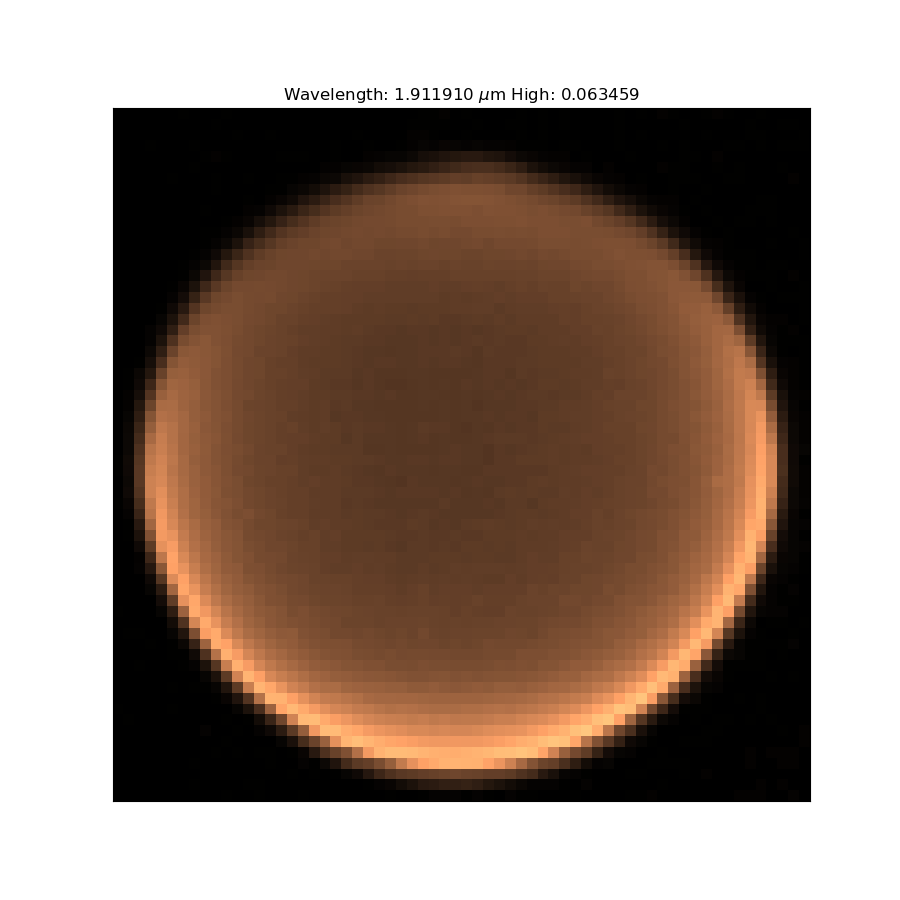

In [6]:
fig, ax = plt.subplots(figsize = (xDim,yDim))

#Data storage is a 3D array in the wrong order, we need to get a 2D one out of it.
temp = np.transpose(dataStorage) #xyz to zyx
dataShaped = np.transpose(temp[0]) #zyx to yx to xy

image = ax.pcolormesh(dataShaped, cmap="copper")
ax.set(xticks=[], yticks=[], title = 'INIT') #Remove ticks.

def update(frame):
    ax.clear()
    dataShaped = np.transpose(temp[frame]) #zyx to yx to xy
    image = ax.pcolormesh(dataShaped, cmap="copper")
    ax.set(xticks=[], yticks=[], title = 'Wavelength: ' + str(zAxis[frame]) + ' $\mu$m High: ' + str(np.amax(dataShaped)))
    
ani = animation.FuncAnimation(fig, update, frames=len(zAxis), interval=100)

plt.show()

## Log Simple Cube Viewer

### For Log Space Shenanigans.

Same as above, just log space.

This notably obscures surface details, so perhaps we don't use log plotting for most of the later options.

<IPython.core.display.Javascript object>


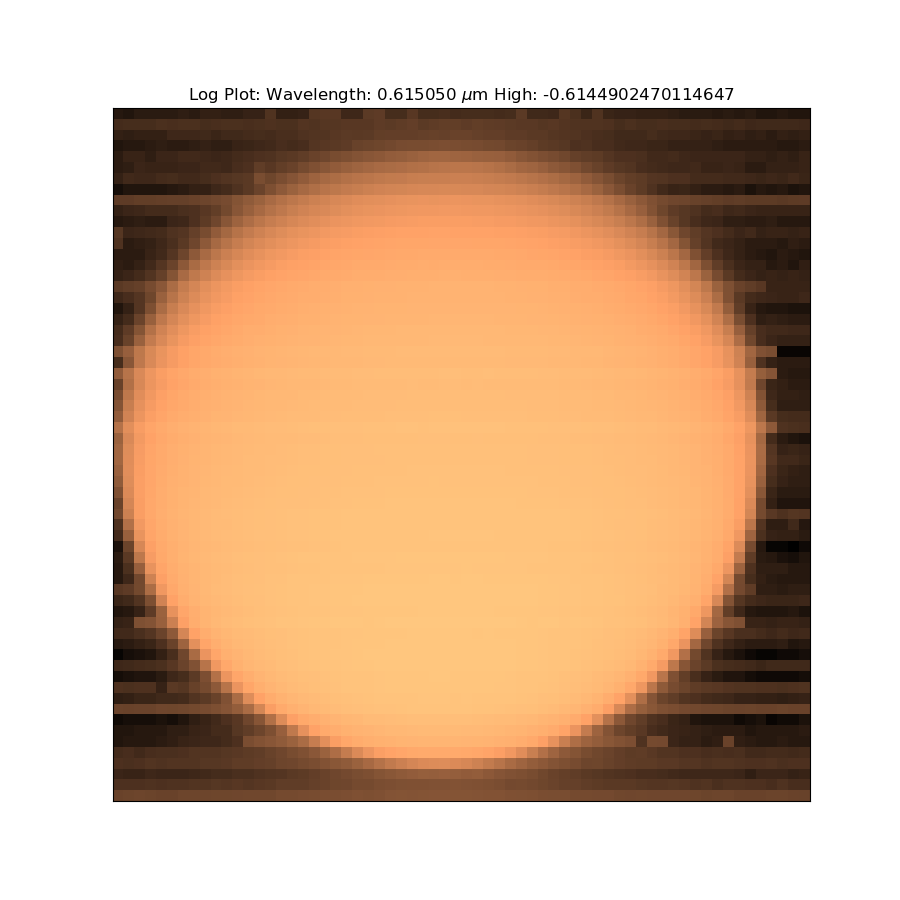

In [7]:
fig, ax = plt.subplots(figsize = (xDim,yDim))

#Data storage is a 3D array in the wrong order, we need to get a 2D one out of it.
temp = np.transpose(dataStorage) #xyz to zyx
dataShaped = np.log10(np.transpose(temp[0])) #zyx to yx to xy
#That log is going to create -infs, scrub them

for i in range(len(dataShaped)):
    for j in range(len(dataShaped[i])):
            if (dataShaped[i][j] < -10):
                dataShaped[i][j] = -4 #Scrub scrub scrub!
                

image = ax.pcolormesh(dataShaped, cmap="copper")
ax.set(xticks=[], yticks=[], title = 'INIT') #Remove ticks.

def update(frame):
    ax.clear()
    dataShaped = np.log10(np.transpose(temp[frame])) #zyx to yx to xy
    #That log is going to create -infs, scrub them

    for i in range(len(dataShaped)):
        for j in range(len(dataShaped[i])):
                if (dataShaped[i][j] < -10):
                    dataShaped[i][j] = -4 #Scrub scrub scrub!

    image = ax.pcolormesh(dataShaped, cmap="copper")
    ax.set(xticks=[], yticks=[], title = 'Log Plot: Wavelength: ' + str(zAxis[frame]) + ' $\mu$m High: ' + str(np.amax(dataShaped)))
    
ani = animation.FuncAnimation(fig, update, frames=len(zAxis), interval=100)

plt.show()



## Atmospheric Windows Display

### Which Data is Useful?

Okay now we display the windows. This first one is not normalized, every image is on its own. Helps if you end up with one of your windows being horribly glitched and unhelpful.

<IPython.core.display.Javascript object>


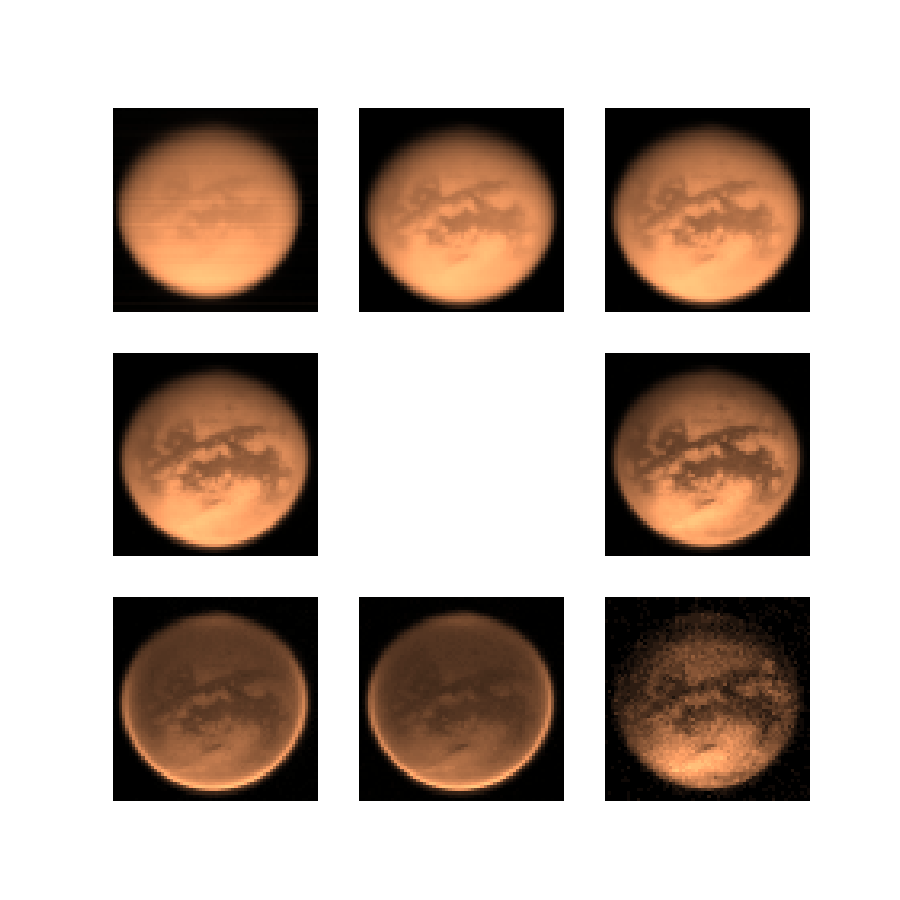

In [8]:

fig, axs = plt.subplots(3,3, figsize = (xDim,yDim)) 

temp = np.transpose(dataStorage)

#Windows are, according to lambertian_wholedisk:
#0.933078, 1.08183, 1.27813, 1.59018, 2.01781, 2.69620, 2.79889, 5.00576



c1 = axs[0,0].pcolormesh(np.transpose(temp[windowInd[0]]), cmap="copper")
c2 = axs[0,1].pcolormesh(np.transpose(temp[windowInd[1]]), cmap="copper")
c3 = axs[0,2].pcolormesh(np.transpose(temp[windowInd[2]]), cmap="copper")
c4 = axs[1,0].pcolormesh(np.transpose(temp[windowInd[3]]), cmap="copper")
c5 = axs[1,2].pcolormesh(np.transpose(temp[windowInd[4]]), cmap="copper")
c6 = axs[2,0].pcolormesh(np.transpose(temp[windowInd[5]]), cmap="copper")
c7 = axs[2,1].pcolormesh(np.transpose(temp[windowInd[6]]), cmap="copper")
c8 = axs[2,2].pcolormesh(np.transpose(temp[windowInd[7]]), cmap="copper")
cax = axs[1,1].inset_axes([0.0, 0.1, 0.5, 1.0])
#fig.colorbar(c4, ax=cax, label='High') 
#fig.tight_layout(pad=1.0)
axs[0,0].axis('off')
axs[0,1].axis('off')
axs[0,2].axis('off')
axs[1,0].axis('off')
axs[1,1].axis('off')
axs[1,2].axis('off')
axs[2,0].axis('off')
axs[2,1].axis('off')
axs[2,2].axis('off')
cax.axis('off')

plt.show()

## Atmospheric Window: Normalized

### Worthwihle Comparisons!

And now we normalize all the images to scale based on the brightest one, so relative brightnesses will matter. 

<IPython.core.display.Javascript object>


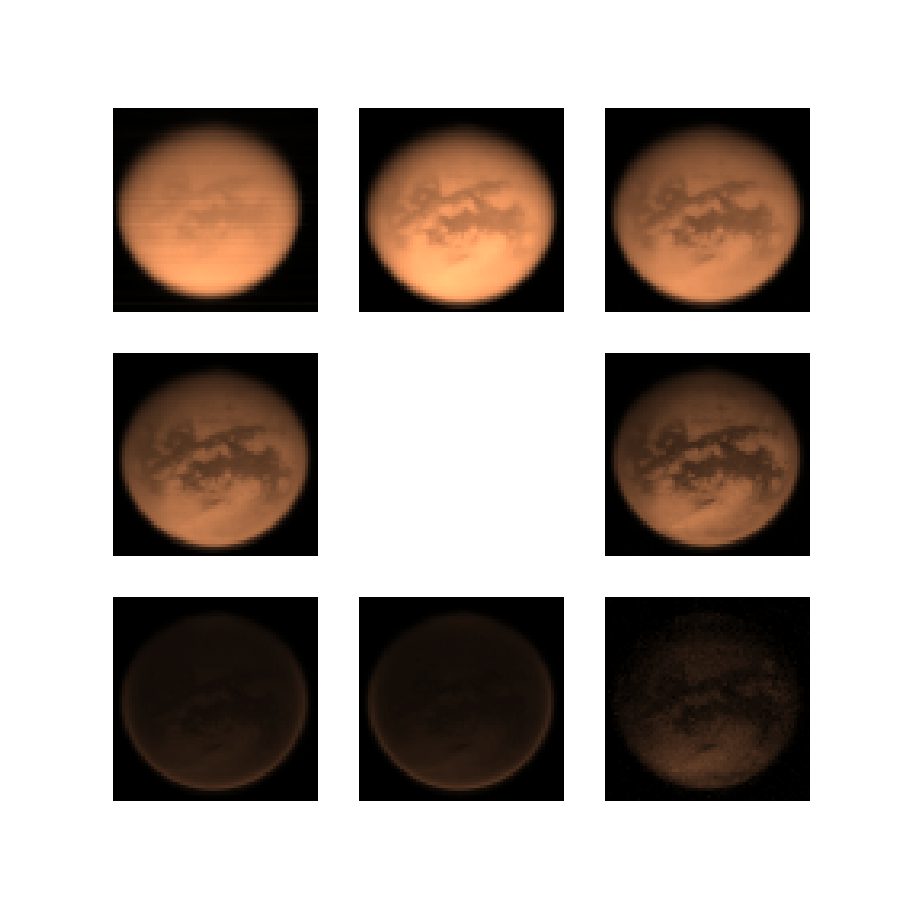

0.259793


In [9]:
fig, axs = plt.subplots(3,3, figsize = (xDim,yDim)) 
temp = np.transpose(dataStorage)

#First, we need to find the maximum of all the data. This will take some finagling.
allData = [temp[windowInd[0]],temp[windowInd[1]],temp[windowInd[2]],temp[windowInd[3]],
          temp[windowInd[4]],temp[windowInd[5]],temp[windowInd[6]],temp[windowInd[7]]]

maximum =  np.amax(allData)
print(maximum)

c1 = axs[0,0].pcolormesh(np.transpose(temp[windowInd[0]]), cmap="copper",vmax=maximum)
c2 = axs[0,1].pcolormesh(np.transpose(temp[windowInd[1]]), cmap="copper",vmax=maximum)
c3 = axs[0,2].pcolormesh(np.transpose(temp[windowInd[2]]), cmap="copper",vmax=maximum)
c4 = axs[1,0].pcolormesh(np.transpose(temp[windowInd[3]]), cmap="copper",vmax=maximum)
c5 = axs[1,2].pcolormesh(np.transpose(temp[windowInd[4]]), cmap="copper",vmax=maximum)
c6 = axs[2,0].pcolormesh(np.transpose(temp[windowInd[5]]), cmap="copper",vmax=maximum)
c7 = axs[2,1].pcolormesh(np.transpose(temp[windowInd[6]]), cmap="copper",vmax=maximum)
c8 = axs[2,2].pcolormesh(np.transpose(temp[windowInd[7]]), cmap="copper",vmax=maximum)
cax = axs[1,1].inset_axes([0.0, 0.1, 0.5, 1.0])
#fig.colorbar(c4, ax=cax, label='High') 
#fig.tight_layout(pad=1.0)
axs[0,0].axis('off')
axs[0,1].axis('off')
axs[0,2].axis('off')
axs[1,0].axis('off')
axs[1,1].axis('off')
axs[1,2].axis('off')
axs[2,0].axis('off')
axs[2,1].axis('off')
axs[2,2].axis('off')
cax.axis('off')

plt.show()

## Color View!

### Let's recreate titancolor2

This produces a single image in three colors according to the titancolor2 color scheme normally used.

We should get images that look like the actual pictures online. Greeeeeen...

RGB correlates to different windows: 5 microns, 2 microns, and 1.3 microns respectively. These correspond to indeces 7 4 and 2 for our windows. 

<IPython.core.display.Javascript object>


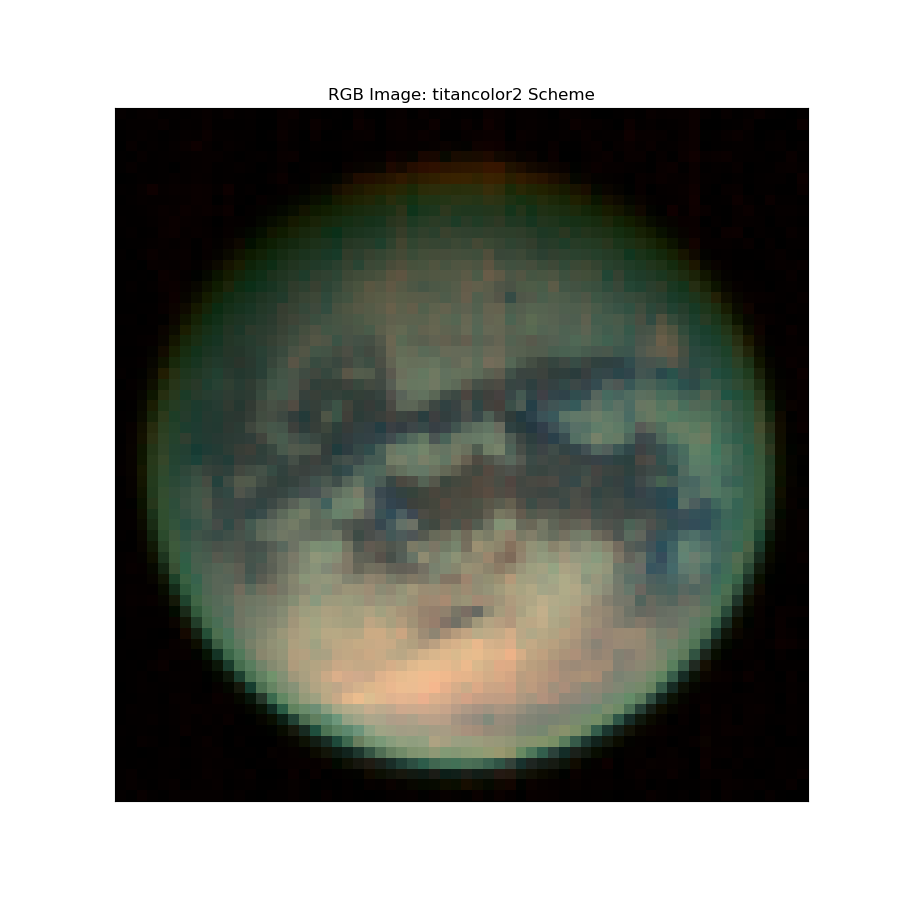

In [10]:
fig, ax = plt.subplots(figsize = (xDim,yDim)) 
temp = np.transpose(dataStorage)

#One of our colors is an average in titancolor2, so we need to grab it::
ave = (temp[336]+temp[337]+temp[338]+temp[339]+temp[340]+temp[341]
      +temp[342]+temp[343]+temp[344]+temp[345]+temp[346]+temp[347]
      +temp[348]+temp[349]+temp[350]+temp[351])/16.

mod = 1.
#For adjusting the overall brightness/saturation

# set R, G, and B
R = ave/(mod*1.12/16.) #Why do this rather than just have a number? I will never know...
G = temp[165]/(mod*0.22)
B = (temp[120]-0.03)/(mod*0.37)




#B's value can introduce negatives, remove them.
i,j = 0,0
for x in B:
    j=0
    for y in x:
        if (y < 0):
            B[i][j] = 0
        j = j+1
    i = i+1

#These division values were found from titancolor2.
#Apparently we *don't* plot the three at the same intensity.

# Now we need to combine them in the correct form: xyc, that is, x, y, then color value. 
colorData = [R,G,B] # arranged in cyx. I thought RGB needed to be transposed but evidentialy not. Hmm.
colorData = np.transpose(colorData) #arranged in xyc

#Now we need to normalize the colors.
#maximum =  np.amax(colorData)
#print(maximum)
#colorData = colorData / maximum #Sets maximum to 1 for RGB. As it should.
#print(colorData)

#Now we have a problem with there being *negative* values in here for whatever reason. 
#However it appears imshow is handling that automatically.
#Of course, now we ask why there are negative values in the first place...
#They are in the raw data, I checked, so probably noise.

image = ax.imshow(colorData, origin="lower") #origin set since we've transposed one too many times.
ax.set(xticks=[], yticks=[], title = 'RGB Image: titancolor2 Scheme') 

plt.show()

## Alternate Color View

### For when you want to make composite images that are not the standard coloration.

<IPython.core.display.Javascript object>


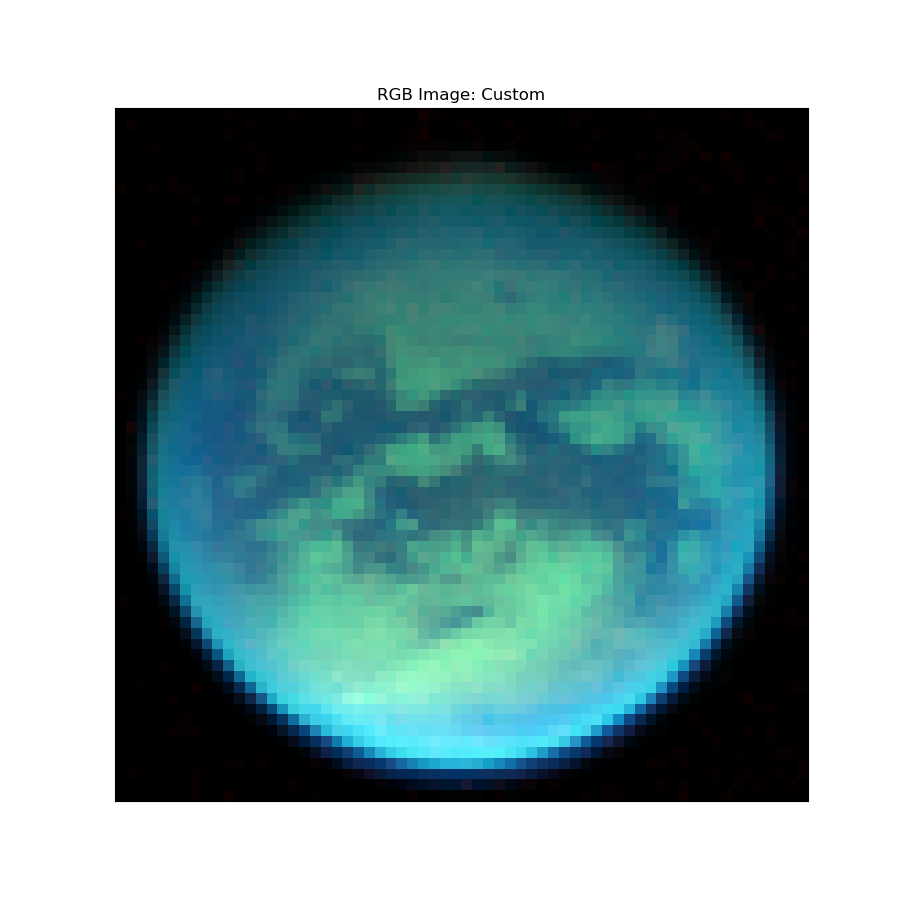

In [11]:
fig, ax = plt.subplots(figsize = (xDim,yDim)) 
temp = np.transpose(dataStorage)

# set R, G, and B
R = temp[indexFromWav(5.)]
G = temp[indexFromWav(2.)]
B = temp[indexFromWav(1.3)]

# Now we need to combine them in the correct form: xyc, that is, x, y, then color value. 
#R = np.transpose(R)
#G = np.transpose(G)
#B = np.transpose(B) # switches xy to yx.
colorData = [R,G,B] # arranged in cyx
colorData = np.transpose(colorData) #arranged in xyc

#Now we need to normalize the colors, as we are doing no manual scaling.
maximum =  np.amax(colorData)
colorData = colorData / maximum #Sets maximum to 1 for RGB. As it should.
#print(colorData)

image = ax.imshow(colorData, origin="lower")
ax.set(xticks=[], yticks=[], title = 'RGB Image: Custom') 

plt.show()

## Alternate Color: Scaled Colors

### Hey, some wavelengths are brighter than others, and we'd like to artificially inflate the value of one of them for visual purposes. 

This does the artificial inflating automatically, normalizing every color with the highest being 1. 

<IPython.core.display.Javascript object>


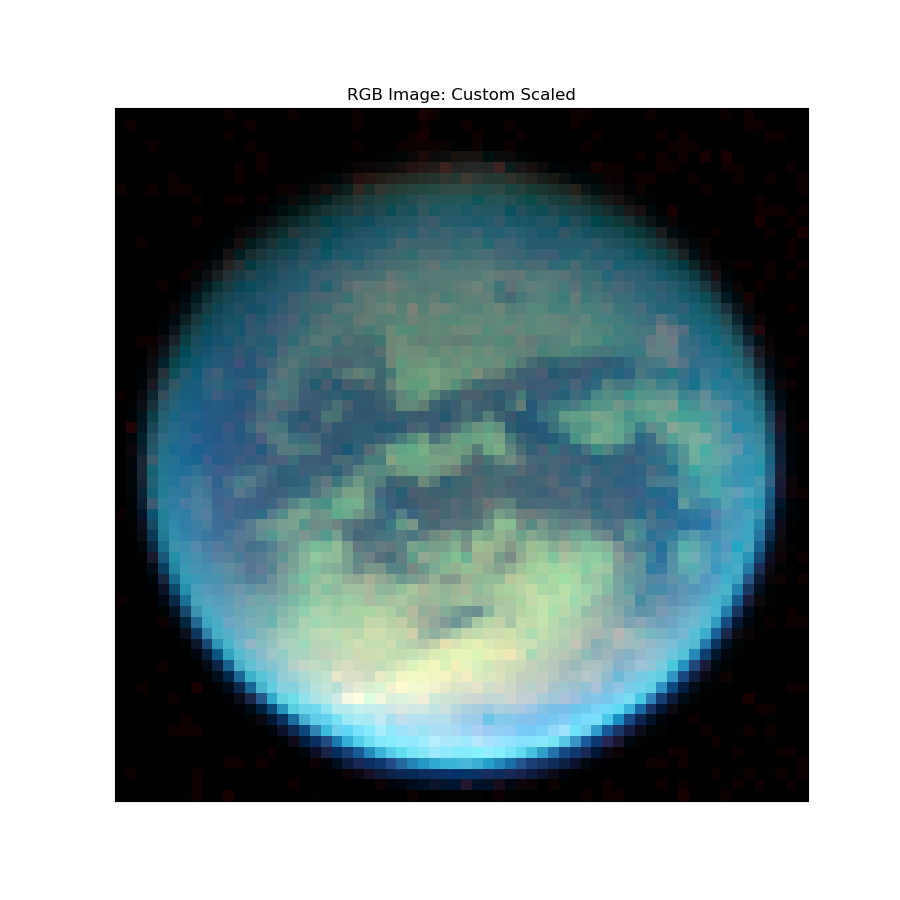

In [12]:
fig, ax = plt.subplots(figsize = (xDim,yDim)) 
temp = np.transpose(dataStorage)

# set R, G, and B
R = temp[indexFromWav(5.)]
G = temp[indexFromWav(2.)]
B = temp[indexFromWav(1.3)]

#normalize colors prior to compounding them together. 
#I call this "auto" scaling.
maximum = np.amax(R)
R = R/maximum
maximum = np.amax(G)
G = G/maximum
maximum = np.amax(B)
B = B/maximum

# Now we need to combine them in the correct form: xyc, that is, x, y, then color value. 
#R = np.transpose(R)
#G = np.transpose(G)
#B = np.transpose(B) # switches xy to yx.
colorData = [R,G,B] # arranged in cyx
colorData = np.transpose(colorData) #arranged in xyc

image = ax.imshow(colorData, origin="lower")
ax.set(xticks=[], yticks=[], title = 'RGB Image: Custom Scaled') 

plt.show()

## Color Scheme Examiner

### Just Display Everything, look at it all.

I have a sneaking suspicion this program will take a long time to run. Normalizes individual RGB values to bring out the various colors. Monochrome images are just made from single wavelengths. 



<IPython.core.display.Javascript object>


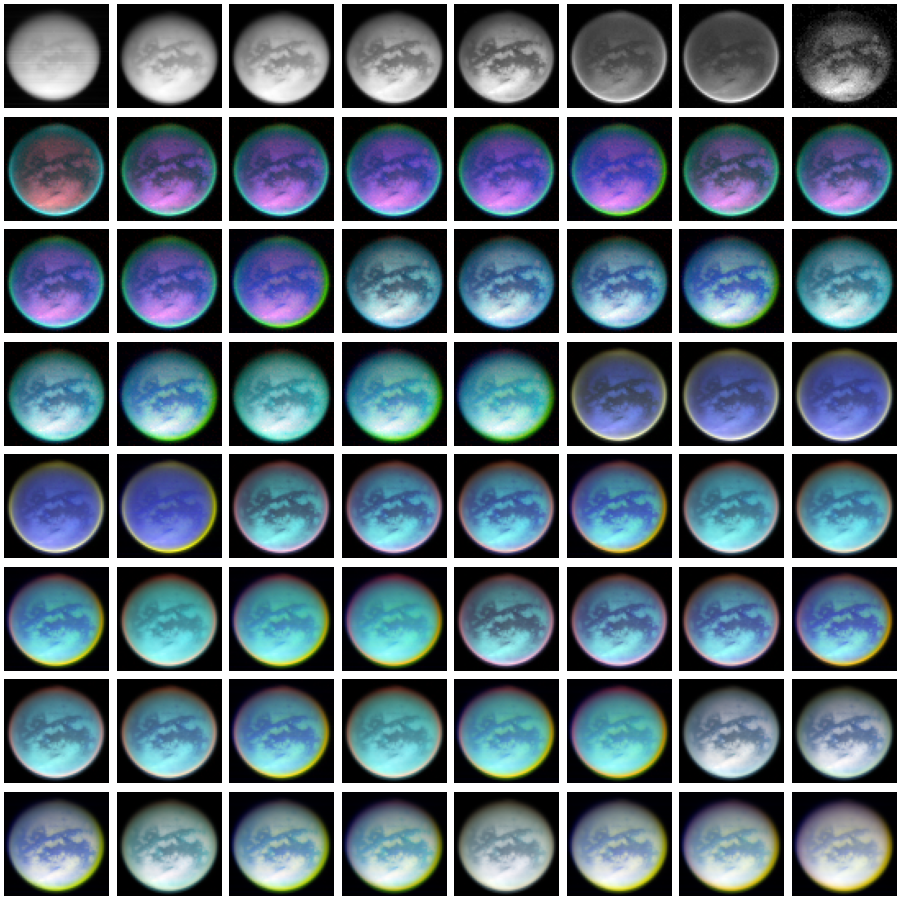

In [13]:
fig, axs = plt.subplots(8,8, figsize = (xDim,yDim), layout="constrained") 
temp = np.transpose(dataStorage)

#Do all of this in one cycle for efficiency
#Iterate over every axes, insert an image into it.
i = 0
j = 0
a = 7
b = 6
c = 5 #abc are indeces for colored images, have to keep track. 
while (i < 8):
    while (j < 8):
        axs[i,j].axis('off')
        if (i == 0): #Single wavelength images.
            
            R = temp[windowInd[j]]
            G = temp[windowInd[j]]
            B = temp[windowInd[j]]
            
            maximum = np.amax(R)
            R = R/maximum
            maximum = np.amax(G)
            G = G/maximum
            maximum = np.amax(B)
            B = B/maximum
            
            colorData = [R,G,B] # arranged in cyx
            colorData = np.transpose(colorData) #arranged in xyc
            
            axs[i,j].imshow(colorData, origin="lower")
        else: #tri-color images.
            #The difference here is that we need to make sure we hit every reasonable
            #RGB color scheme without duplicating. 
                
            R = temp[windowInd[a]]
            G = temp[windowInd[b]]
            B = temp[windowInd[c]]
            
            maximum = np.amax(R)
            R = R/maximum
            maximum = np.amax(G)
            G = G/maximum
            maximum = np.amax(B)
            B = B/maximum
            
            colorData = [R,G,B] # arranged in cyx
            colorData = np.transpose(colorData) #arranged in xyc
            
            axs[i,j].imshow(colorData, origin="lower")
            
            #and now figure out what the next index is.
            if (b == 1): #G can never be the smallest wavelength, cannot be 0. 
                a = a-1 #reduce R value
                b = a-1 #make G 1 less than R
                c = b-1 #make B 1 less than G
            elif (c == 0):
                b = b-1 #reduce G value
                c = b-1 #make B 1 less than G                
            else:
                c = c-1 #reduce B's wavelength.
        j = j + 1
    i = i + 1
    j = 0
#thought I could do this automatically, but for some reason axs doesn't want to be iterated over automatically.

#plt.savefig("TitanColorSchemes.tif", format="tif", bbox_inches='tight')

plt.show()

Now do the same thing but without the autoscaling.

<IPython.core.display.Javascript object>


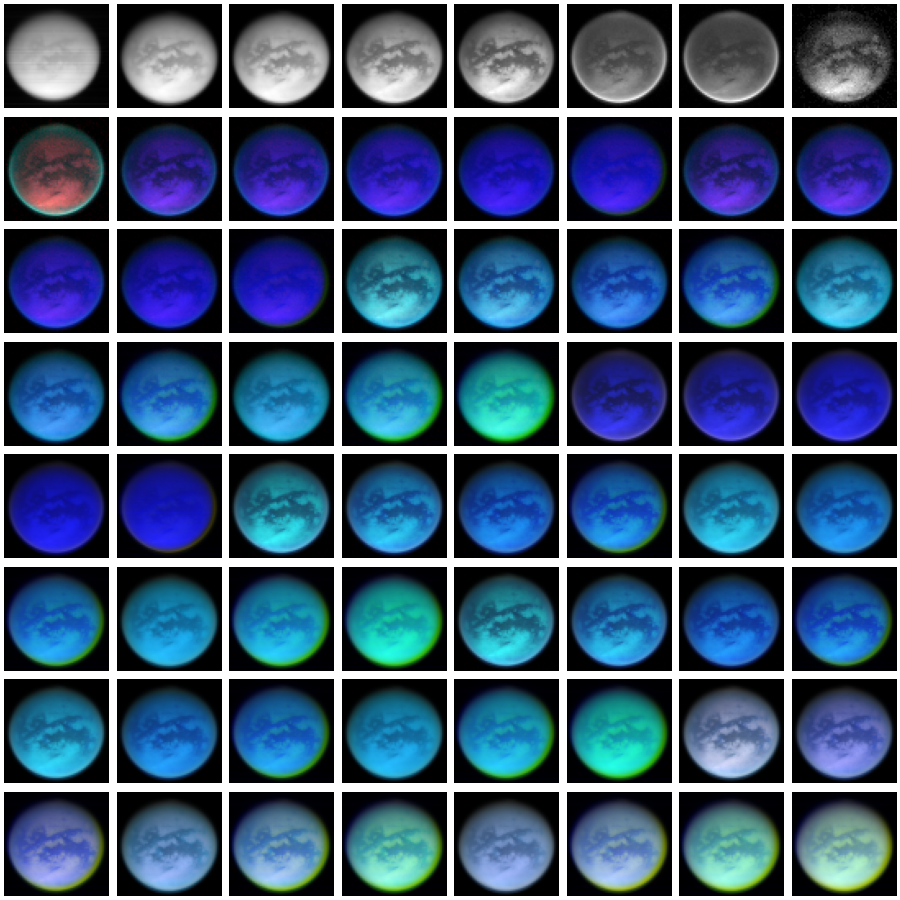

In [14]:
fig, axs = plt.subplots(8,8, figsize = (xDim,yDim), layout="constrained") 
temp = np.transpose(dataStorage)

#Do all of this in one cycle for efficiency
#Iterate over every axes, insert an image into it.
i = 0
j = 0
a = 7
b = 6
c = 5 #abc are indeces for colored images, have to keep track. 
while (i < 8):
    while (j < 8):
        axs[i,j].axis('off')
        if (i == 0): #Single wavelength images.
            
            R = temp[windowInd[j]]
            G = temp[windowInd[j]]
            B = temp[windowInd[j]]
            
            colorData = [R,G,B] # arranged in cyx
            colorData = np.transpose(colorData) #arranged in xyc
            colorData = colorData/np.amax(colorData)
            
            axs[i,j].imshow(colorData, origin="lower")
        else: #tri-color images.
            #The difference here is that we need to make sure we hit every reasonable
            #RGB color scheme without duplicating. 
                
            R = temp[windowInd[a]]
            G = temp[windowInd[b]]
            B = temp[windowInd[c]]
            
            colorData = [R,G,B] # arranged in cyx
            colorData = np.transpose(colorData) #arranged in xyc
            colorData = colorData/np.amax(colorData)
            
            axs[i,j].imshow(colorData, origin="lower")
            
            #and now figure out what the next index is.
            if (b == 1): #G can never be the smallest wavelength, cannot be 0. 
                a = a-1 #reduce R value
                b = a-1 #make G 1 less than R
                c = b-1 #make B 1 less than G
            elif (c == 0):
                b = b-1 #reduce G value
                c = b-1 #make B 1 less than G                
            else:
                c = c-1 #reduce B's wavelength.
        j = j + 1
    i = i + 1
    j = 0
#thought I could do this automatically, but for some reason axs doesn't want to be iterated over automatically.

#plt.savefig("TitanColorSchemes.tif", format="tif", bbox_inches='tight')

plt.show()

## Full Interactive Viewer

### Make Your Own Colors Live!

This should be a program that can be manipulated via sliders, no need for code analysis or messing. It should allow you to look at a cube in any color scheme you may wish.

NOTE: even though we display in a column the actual relative intensity of each of the RGB channel, the final image is not composed with them but with the normalized color channels.

<IPython.core.display.Javascript object>


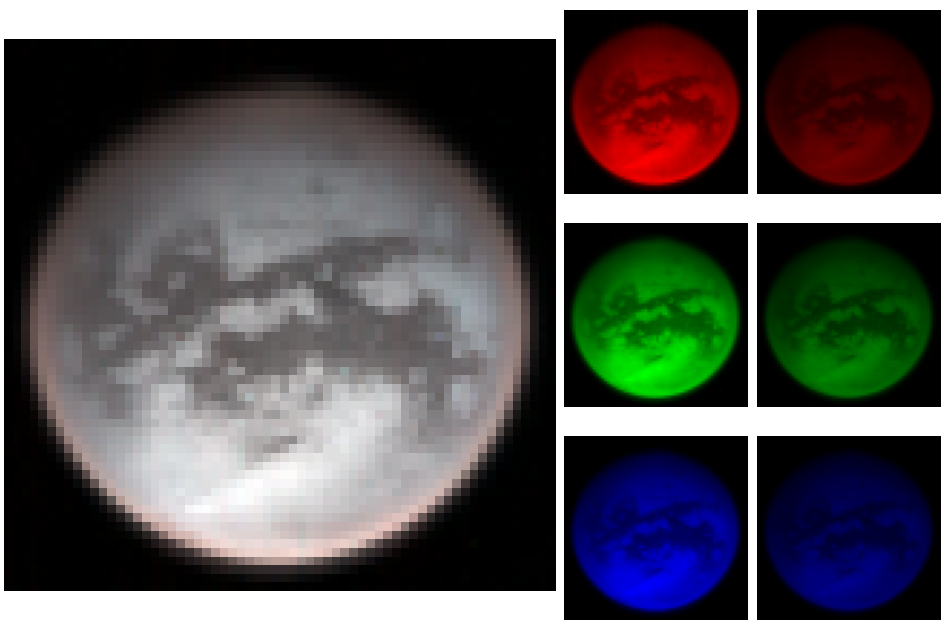

In [15]:
fig, axs = plt.subplot_mosaic([['A', 'A', 'A', 'R', 'R2'],['A', 'A', 'A', 'G', 'G2'],['A', 'A', 'A', 'B', 'B2']], 
                              figsize = (xDim*1.5*.7,yDim*.7), layout="constrained") 
temp = np.transpose(dataStorage)

#This stuff up front is making sure we don't just "lose" access to colorData.
R = temp[windowInd[7]]
G = temp[windowInd[4]]
B = temp[windowInd[2]]

maximum = np.amax(R)
R = R/maximum
maximum = np.amax(G)
G = G/maximum
maximum = np.amax(B)
B = B/maximum

allMax =  np.amax(temp) #For visual scaling; what are the REAL values?

colorData = [R,G,B] # arranged in cyx
colorData = np.transpose(colorData) #arranged in xyc

def slice(wavR,wavG,wavB,scaleR,scaleG,scaleB):
    R = temp[indexFromWav(wavR)]
    G = temp[indexFromWav(wavG)]
    B = temp[indexFromWav(wavB)]

    maximum = np.amax(R)
    R = scaleR*R/maximum
    maximum = np.amax(G)
    G = scaleG*G/maximum
    maximum = np.amax(B)
    B = scaleB*B/maximum

    colorData = [R,G,B] # arranged in cyx
    colorData = np.transpose(colorData) #arranged in xyc
    
    return colorData
#This is the function the controller uses for live updates.

def sliceR(wavR,wavG,wavB,scaleR,scaleG,scaleB):
    R = temp[indexFromWav(wavR)]
    G = temp[indexFromWav(wavR)]
    B = temp[indexFromWav(wavR)]

    maximum = np.amax(R)
    R = R/maximum
    G = G*0.
    B = B*0.

    colorData = [R,G,B] # arranged in cyx
    colorData = np.transpose(colorData) #arranged in xyc
    
    return colorData
#This is the function the controller uses for live updates.

def sliceG(wavR,wavG,wavB,scaleR,scaleG,scaleB):
    R = temp[indexFromWav(wavG)]
    G = temp[indexFromWav(wavG)]
    B = temp[indexFromWav(wavG)]

    R = R*0.
    maximum = np.amax(G)
    G = G/maximum
    B = B*0.

    colorData = [R,G,B] # arranged in cyx
    colorData = np.transpose(colorData) #arranged in xyc
    
    return colorData
#This is the function the controller uses for live updates.

def sliceB(wavR,wavG,wavB,scaleR,scaleG,scaleB):
    R = temp[indexFromWav(wavB)]
    G = temp[indexFromWav(wavB)]
    B = temp[indexFromWav(wavB)]

    R = R*0.
    G = G*0.
    maximum = np.amax(B)
    B = B/maximum

    colorData = [R,G,B] # arranged in cyx
    colorData = np.transpose(colorData) #arranged in xyc
    
    return colorData
#This is the function the controller uses for live updates.

def sliceR2(wavR,wavG,wavB,scaleR,scaleG,scaleB):
    R = temp[indexFromWav(wavR)]*(1./allMax)
    G = temp[indexFromWav(wavR)]*0.
    B = temp[indexFromWav(wavR)]*0.

    colorData = [R,G,B] # arranged in cyx
    colorData = np.transpose(colorData) #arranged in xyc
    
    return colorData
#This is the function the controller uses for live updates.

def sliceG2(wavR,wavG,wavB,scaleR,scaleG,scaleB):
    R = temp[indexFromWav(wavG)]*0.
    G = temp[indexFromWav(wavG)]*(1./allMax)
    B = temp[indexFromWav(wavG)]*0.

    colorData = [R,G,B] # arranged in cyx
    colorData = np.transpose(colorData) #arranged in xyc
    
    return colorData
#This is the function the controller uses for live updates.

def sliceB2(wavR,wavG,wavB,scaleR,scaleG,scaleB):
    R = temp[indexFromWav(wavB)]*0.
    G = temp[indexFromWav(wavB)]*0.
    B = temp[indexFromWav(wavB)]*(1./allMax)

    colorData = [R,G,B] # arranged in cyx
    colorData = np.transpose(colorData) #arranged in xyc
    
    return colorData
#This is the function the controller uses for live updates.

axs["A"].axis("off")
axs["R"].axis("off")
axs["G"].axis("off")
axs["B"].axis("off")
axs["R2"].axis("off")
axs["G2"].axis("off")
axs["B2"].axis("off")

controls = iplt.imshow(slice,  wavR=(0.3,5.1,200), wavG=(0.3,5.1,200), wavB=(0.3,5.1,200), 
                       scaleR=(1.0, 0.0,100), scaleG=(1.0, 0.0,100), scaleB=(1.0, 0.0,100), ax = axs["A"],origin="lower")
iplt.imshow(sliceR, controls=controls, ax = axs["R"],origin="lower")
iplt.imshow(sliceG, controls=controls, ax = axs["G"],origin="lower")
iplt.imshow(sliceB, controls=controls, ax = axs["B"],origin="lower")
iplt.imshow(sliceR2, controls=controls, ax = axs["R2"],origin="lower")
iplt.imshow(sliceG2, controls=controls, ax = axs["G2"],origin="lower")
iplt.imshow(sliceB2, controls=controls, ax = axs["B2"],origin="lower")

#plt.savefig("TitanColorSchemes.tif", format="tif", bbox_inches='tight')

plt.show()

## Color Scheme Randomizer

### For when you don't know what color to do.

Sometimes we dunno what color to set things at. So here's an animation that cycles through random colors, though making sure only one window is used at a time. (We aren't here to look at the atmosphere usually).

<IPython.core.display.Javascript object>


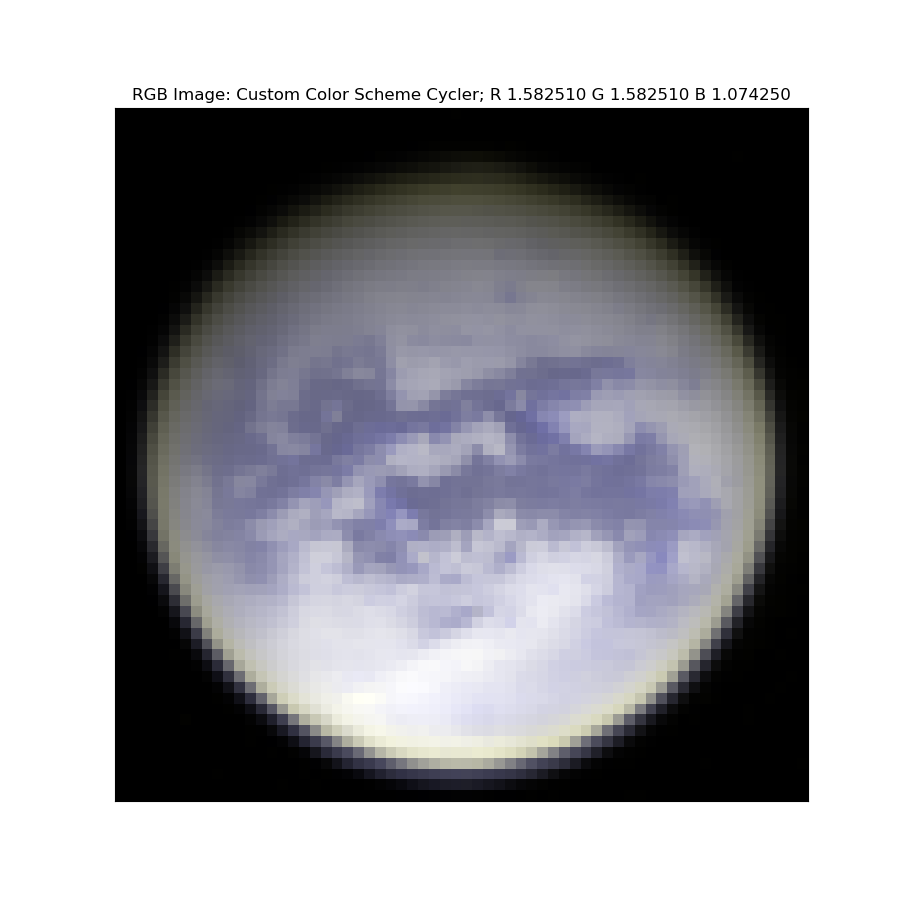

In [16]:
fig, ax = plt.subplots(figsize = (9,9)) #size not dynamic due to long title.
temp = np.transpose(dataStorage)

# set R, G, and B
R = temp[windowInd[2]]
G = temp[windowInd[1]]
B = temp[windowInd[0]]

#normalize colors prior to compounding them together. 
maximum = np.amax(R)
R = R/maximum
maximum = np.amax(G)
G = G/maximum
maximum = np.amax(B)
B = B/maximum

# Now we need to combine them in the correct form: xyc, that is, x, y, then color value. 
#R = np.transpose(R)
#G = np.transpose(G)
#B = np.transpose(B) # switches xy to yx.
colorData = [R,G,B] # arranged in cyx
colorData = np.transpose(colorData) #arranged in xyc

#Now we need to normalize the colors.
#maximum =  np.amax(colorData)
#colorData = colorData / maximum #Sets maximum to 1 for RGB. As it should.
#print(colorData)

rand1 = random.choice(windowInd)
rand2 = random.choice(windowInd)
rand3 = random.choice(windowInd)
image = ax.imshow(colorData, origin="lower")
ax.set(xticks=[], yticks=[], title = 'RGB Image: Custom Color Scheme Cycler; R ' + 
          str(zAxis[rand1]) + " G " + str(zAxis[rand2]) + " B " + str(zAxis[rand3]))

def update(frame):
    ax.clear()
    rand1 = random.choice(windowInd)
    rand2 = random.choice(windowInd)
    rand3 = random.choice(windowInd)
    R = temp[rand1]
    G = temp[rand2]
    B = temp[rand3]

    maximum = np.amax(R)
    R = R/maximum
    maximum = np.amax(G)
    G = G/maximum
    maximum = np.amax(B)
    B = B/maximum

    colorData = [R,G,B] # arranged in cyx
    colorData = np.transpose(colorData) #arranged in xyc
    image = ax.imshow(colorData, origin="lower")
    ax.set(xticks=[], yticks=[], title = 'RGB Image: Custom Color Scheme Cycler; R ' + 
          str(zAxis[rand1]) + " G " + str(zAxis[rand2]) + " B " + str(zAxis[rand3]))
    
ani = animation.FuncAnimation(fig, update, frames=3, interval=2000)

plt.show()

## For Simulated Data

### Sometimes we just have simulated stuff that needs dealing with. 

So simulated data isn't going to be in one cube, so we'll have to a bit more careful when reading it in.

In [17]:
#File insertion goes here.
#Make sure to put the entire file path here. 
#You do not need to specify the axes file, it can be found automatically from this one.

#LAMBERTIAN:
#filepath1 = r"C:\Users\deran\Desktop\CubeCSVDatabase\csvHolderLamb\EsSayeh_w5.00_p000.colorCCD.Jcube.csv"
#filepath2 = r"C:\Users\deran\Desktop\CubeCSVDatabase\csvHolderLamb\EsSayeh_w2.01_p000.colorCCD.Jcube.csv"
#filepath3 = r"C:\Users\deran\Desktop\CubeCSVDatabase\csvHolderLamb\EsSayeh_w1.27_p000.colorCCD.Jcube.csv"

#SPECULAR
filepath1 = r"C:\Users\deran\Desktop\CubeCSVDatabase\specularCSVs\specular_w5.00_p000.colorCCD.Jcube.csv"
filepath2 = r"C:\Users\deran\Desktop\CubeCSVDatabase\specularCSVs\specular_w2.01_p000.colorCCD.Jcube.csv"
filepath3 = r"C:\Users\deran\Desktop\CubeCSVDatabase\specularCSVs\specular_w1.27_p000.colorCCD.Jcube.csv"

#Now we extract the axes files as well...

axesfp1 = filepath1.removesuffix(".csv") + ".axes.csv"
axesfp2 = filepath2.removesuffix(".csv") + ".axes.csv"
axesfp3 = filepath3.removesuffix(".csv") + ".axes.csv"

# Skeleton code nabbed from https://realpython.com/python-csv/
#We're going to messily just do it in triplicate. Whoop!

import csv
import math

#Step 1: use the axes to determine the size of what we're dealing with.

xAxis1 = []
yAxis1 = []
zAxis1 = []
xAxis2 = []
yAxis2 = []
zAxis2 = []
xAxis3 = []
yAxis3 = []
zAxis3 = []

with open(axesfp1) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        i = 0
        L = len(row)
        while (i < L-1):
            if (line_count == 0):
                xAxis1.append(row[i])
            elif (line_count == 1):
                yAxis1.append(row[i])
            elif (line_count == 2):
                zAxis1.append(row[i])
            i = i+1
        line_count += 1
with open(axesfp2) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        i = 0
        L = len(row)
        while (i < L-1):
            if (line_count == 0):
                xAxis2.append(row[i])
            elif (line_count == 1):
                yAxis2.append(row[i])
            elif (line_count == 2):
                zAxis2.append(row[i])
            i = i+1
        line_count += 1
with open(axesfp3) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        i = 0
        L = len(row)
        while (i < L-1):
            if (line_count == 0):
                xAxis3.append(row[i])
            elif (line_count == 1):
                yAxis3.append(row[i])
            elif (line_count == 2):
                zAxis3.append(row[i])
            i = i+1
        line_count += 1
#We now have an x, y, and z axis. x and y axes are just ordinal, but the z axis contains wavelength in microns.
#The lengths of these arrays tell us how to extract the data.

dataStorage1 = [[[0 for x in range(len(zAxis1))] for x in range(len(yAxis1))] for x in range(len(xAxis1))] 
dataStorage2 = [[[0 for x in range(len(zAxis2))] for x in range(len(yAxis2))] for x in range(len(xAxis2))] 
dataStorage3 = [[[0 for x in range(len(zAxis3))] for x in range(len(yAxis3))] for x in range(len(xAxis3))] 

#The above holds the data of the cube itself. 

with open(filepath1) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < len(xAxis1)):
            dataStorage1[i][j][k] = float(row[i])
            if (math.isnan(dataStorage1[i][j][k])):
                dataStorage1[i][j][k] = 0 #We set nans to zero to allow plotting to take place, careful!
            elif (dataStorage1[i][j][k] < 0):
                dataStorage1[i][j][k] = 0 #Negative values are nonsense.
            elif (dataStorage1[i][j][k] > 1):
                dataStorage1[i][j][k] = 1 #Make saturation obvious? Keep it from overloading. 
            i = i + 1
        i = 0
        j = j + 1
        if (j >= len(yAxis1)):
            j = 0
            k = k + 1
        line_count += 1
with open(filepath2) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < len(xAxis2)):
            dataStorage2[i][j][k] = float(row[i])
            if (math.isnan(dataStorage2[i][j][k])):
                dataStorage2[i][j][k] = 0 #We set nans to zero to allow plotting to take place, careful!
            elif (dataStorage2[i][j][k] < 0):
                dataStorage2[i][j][k] = 0 #Negative values are nonsense.
            elif (dataStorage2[i][j][k] > 1):
                dataStorage2[i][j][k] = 1 #Make saturation obvious? Keep it from overloading. 
            i = i + 1
        i = 0
        j = j + 1
        if (j >= len(yAxis2)):
            j = 0
            k = k + 1
        line_count += 1
with open(filepath3) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < len(xAxis3)):
            dataStorage3[i][j][k] = float(row[i])
            if (math.isnan(dataStorage3[i][j][k])):
                dataStorage3[i][j][k] = 0 #We set nans to zero to allow plotting to take place, careful!
            elif (dataStorage3[i][j][k] < 0):
                dataStorage3[i][j][k] = 0 #Negative values are nonsense.
            elif (dataStorage3[i][j][k] > 1):
                dataStorage3[i][j][k] = 1 #Make saturation obvious? Keep it from overloading. 
            i = i + 1
        i = 0
        j = j + 1
        if (j >= len(yAxis3)):
            j = 0
            k = k + 1
        line_count += 1

#The data is now read in.
#all future programs in this notebook should be able to access xAxis, yAxis, zAxis and dataStorage.
#dataStorage is stored in xyz order, that is x, y, and wavelength. 
#Though uh in this case siulation images are usually only one wavelength...

#image dimensions are fungible. Calculate them.  
xDim = 0
yDim = 0
if (len(xAxis1) > len(yAxis1)):
    yDim = 9 
    xDim = 9/(len(xAxis1)/len(yAxis1))
else:
    xDim = 9
    yDim = 9/(len(yAxis1)/len(xAxis1))
#This may seem backward, but transpositions occur so...

print(np.amax(dataStorage1))
print(np.amin(dataStorage1))    
print(np.amax(dataStorage2))
print(np.amin(dataStorage2))    
print(np.amax(dataStorage3))
print(np.amin(dataStorage3))

0.03319
0.0
0.096896
0.0
0.386069
0.0


<IPython.core.display.Javascript object>


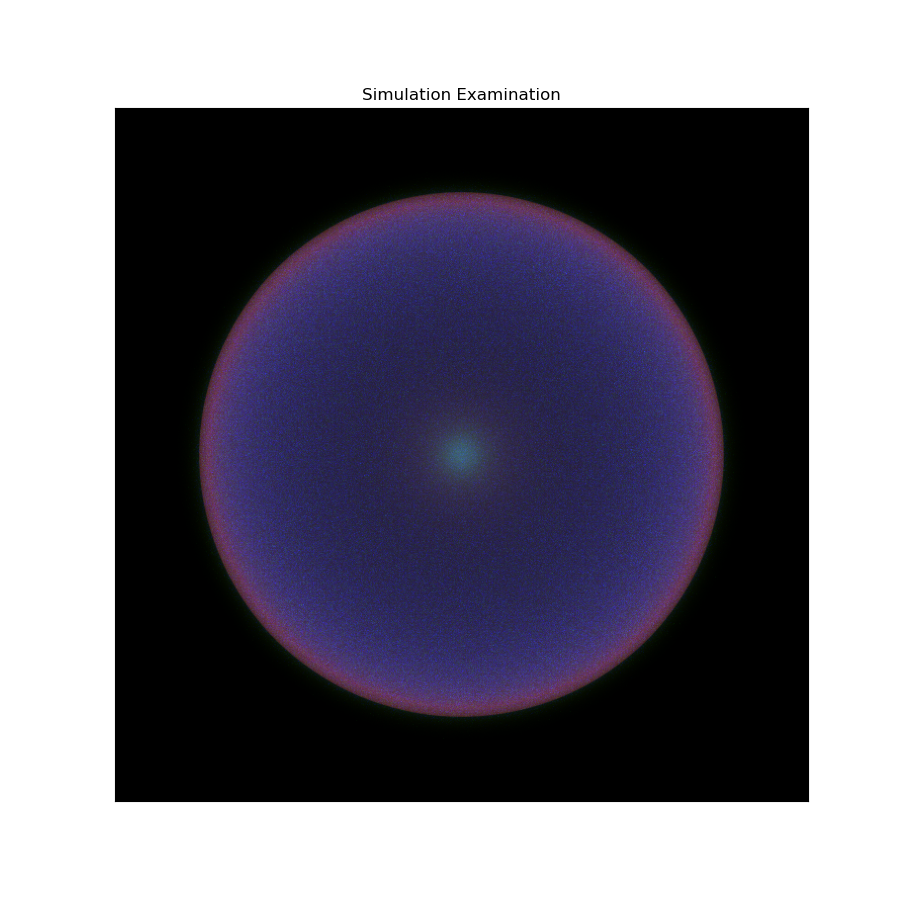

In [18]:
#Okay now that we've read it in, display it.

fig, ax = plt.subplots(figsize = (xDim,yDim)) 
temp1 = np.transpose(dataStorage1)
temp2 = np.transpose(dataStorage2)
temp3 = np.transpose(dataStorage3)

mod = 1.
#For adjusting the overall brightness/saturation

# set R, G, and B
#R = temp[0]
#G = temp2[0]
#B = temp3[0]

#R = temp[0]/(mod*1.12) #Why do this rather than just have a number? I will never know...
#G = temp2[0]/(mod*0.22)
#B = (temp3[0]-0.03)/(mod*0.37)

R = temp1[0]/(mod*1.12/16.) #Why do this rather than just have a number? I will never know...
G = temp2[0]/(mod*0.22)
B = (temp3[0]-0.03)/(mod*0.37)

#B's value can introduce negatives, remove them.
i,j = 0,0
for x in B:
    j=0
    for y in x:
        if (y < 0):
            B[i][j] = 0
        j = j+1
    i = i+1

#These division values were found from titancolor2.
#Apparently we *don't* plot the three at the same intensity.

# Now we need to combine them in the correct form: xyc, that is, x, y, then color value. 
colorData = [R,G,B] # arranged in cyx. I thought RGB needed to be transposed but evidentialy not. Hmm.
colorData = np.transpose(colorData) #arranged in xyc

#Now we need to normalize the colors.
#maximum =  np.amax(colorData)
#print(maximum)
#colorData = colorData / maximum #Sets maximum to 1 for RGB. As it should.
#print(colorData)

#Now we have a problem with there being *negative* values in here for whatever reason. 
#However it appears imshow is handling that automatically.
#Of course, now we ask why there are negative values in the first place...
#They are in the raw data, I checked, so probably noise.

image = ax.imshow(colorData, origin="lower") #origin set since we've transposed one too many times.
ax.set(xticks=[], yticks=[], title = 'Simulation Examination') 

plt.show()

## Batch Image Creator

### For Simulated Images

For this next trick, we need to re-create the images and whole animation for a large portion of data. Fortunately, we do have code to do this. We just need it to be modular instead of making a single image at a time. Ideally this should be able to be given a folder of data and a color scheme and just get to work.

In [32]:
degOrder = ["000", "005", "010", "015", "020", "025", "030", "035", "040", "045",
          "050", "055", "060", "065", "070", "075", "080", "085", "090", "095",
          "100", "105", "110", "115", "120", "125", "130", "135", "140", "145",
          "150", "155", "160", "165", "170", "175", "180", "185", "190", "195",
          "200", "205", "210", "215", "220", "225", "230", "235", "240", "245",
          "250", "255", "260", "265", "270", "275", "280", "285", "290", "295",
          "300", "305", "310", "315", "320", "325", "330", "335", "340", "345",
          "350", "355"]
windowum = ["0.93", "1.08", "1.27", "1.59", "2.01", "2.69", "2.79", "5.00"]

In [34]:
#Alert: this takes a while to run, make sure you're ingesting what you want to.
#Method is set in the next code block to make this agnostic.

import csv
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
import mpl_interactions.ipyplot as iplt

#Set the initial filepath
fpbeg = r"C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w"
#Just point to the directory that contains all the csv files. Everything else should be findable from there.
#Below are the other strings we need to keep everything modular. 
fpmid = r"_p"
fpend = r".colorCCD.Jcube.csv"
#In the middle will be two different numbers, one for wavelength and one for angle.
#We need arrays with the values we will be using.
#All stored as strings rather than numbers to make file operations simpler. At least in my head.

filepath = fpbeg + windowum[0] + fpmid + degOrder[0] + fpend
axesfp = filepath.removesuffix(".csv") + ".axes.csv"
xAxis = []
yAxis = []
zAxis = []

#Read the Data. 
#Start by reading in the dimensions of just one image, so we can set everything else later.
with open(axesfp) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        i = 0
        L = len(row)
        while (i < L-1):
            if (line_count == 0):
                xAxis.append(row[i])
            elif (line_count == 1):
                yAxis.append(row[i])
            elif (line_count == 2):
                zAxis.append(row[i])
            i = i+1
        line_count += 1
# All data should follow this shape. If all your images aren't the same size what are you doing?

# Let's try a 4D array for all this.
dataStorage = [[[[0 for x in range(len(degOrder))] for x in range(len(windowum))] for x in range(len(yAxis))] for x in range(len(xAxis))]

#Now comes the complicated business of reading *all the files*.

ii = 0
jj = 0
while (ii < len(degOrder)):
    while (jj < len(windowum)):
        filepath = fpbeg + windowum[jj] + fpmid + degOrder[ii] + fpend
        print(filepath)
        with open(filepath) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            line_count = 0
            i, j = 0, 0
            for row in csv_reader:
                while (i < len(xAxis)):
                    dataStorage[i][j][jj][ii] = float(row[i])
                    if (math.isnan(dataStorage[i][j][jj][ii])):
                        dataStorage[i][j][jj][ii] = 0 #We set nans to zero to allow plotting to take place, careful!
                    elif (dataStorage[i][j][jj][ii] < 0):
                        dataStorage[i][j][jj][ii] = 0 #Negative values are nonsense.
                    elif (dataStorage[i][j][jj][ii] > 1):
                        dataStorage[i][j][jj][ii] = 1 #Make saturation obvious? Keep it from overloading. 
                    i = i + 1
                i = 0
                j = j + 1
                if (j >= len(yAxis)):
                    j = 0
                line_count += 1
        jj = jj+1
    ii = ii+1
    jj = 0

C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w0.93_p000.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.08_p000.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.27_p000.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.59_p000.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.01_p000.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.69_p000.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.79_p000.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w5.00_p000.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w0.93_p005.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.08_p005.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.27_p005.colorCCD.Jcube.csv

C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.59_p055.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.01_p055.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.69_p055.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.79_p055.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w5.00_p055.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w0.93_p060.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.08_p060.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.27_p060.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.59_p060.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.01_p060.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.69_p060.colorCCD.Jcube.csv

C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.79_p110.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w5.00_p110.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w0.93_p115.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.08_p115.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.27_p115.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.59_p115.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.01_p115.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.69_p115.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.79_p115.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w5.00_p115.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w0.93_p120.colorCCD.Jcube.csv

C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.08_p170.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.27_p170.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.59_p170.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.01_p170.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.69_p170.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.79_p170.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w5.00_p170.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w0.93_p175.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.08_p175.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.27_p175.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.59_p175.colorCCD.Jcube.csv

C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.01_p225.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.69_p225.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.79_p225.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w5.00_p225.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w0.93_p230.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.08_p230.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.27_p230.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.59_p230.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.01_p230.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.69_p230.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.79_p230.colorCCD.Jcube.csv

C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w5.00_p280.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w0.93_p285.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.08_p285.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.27_p285.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.59_p285.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.01_p285.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.69_p285.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.79_p285.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w5.00_p285.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w0.93_p290.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.08_p290.colorCCD.Jcube.csv

C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.27_p340.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.59_p340.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.01_p340.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.69_p340.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.79_p340.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w5.00_p340.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w0.93_p345.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.08_p345.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.27_p345.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.59_p345.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.01_p345.colorCCD.Jcube.csv

In [35]:
#image dimensions are fungible. Calculate them.  
xDim = 0
yDim = 0
if (len(xAxis) > len(yAxis)):
    yDim = 9 
    xDim = 9/(len(xAxis)/len(yAxis))
else:
    xDim = 9
    yDim = 9/(len(yAxis)/len(xAxis))
#This may seem backward, but transpositions occur so...

#These transpositions take a while, which is why this is its own block.
temp = np.transpose(dataStorage) #Hopefully this still works in 4D as it does in 3D.

mod = 1.
#For adjusting the overall brightness/saturation

<IPython.core.display.Javascript object>


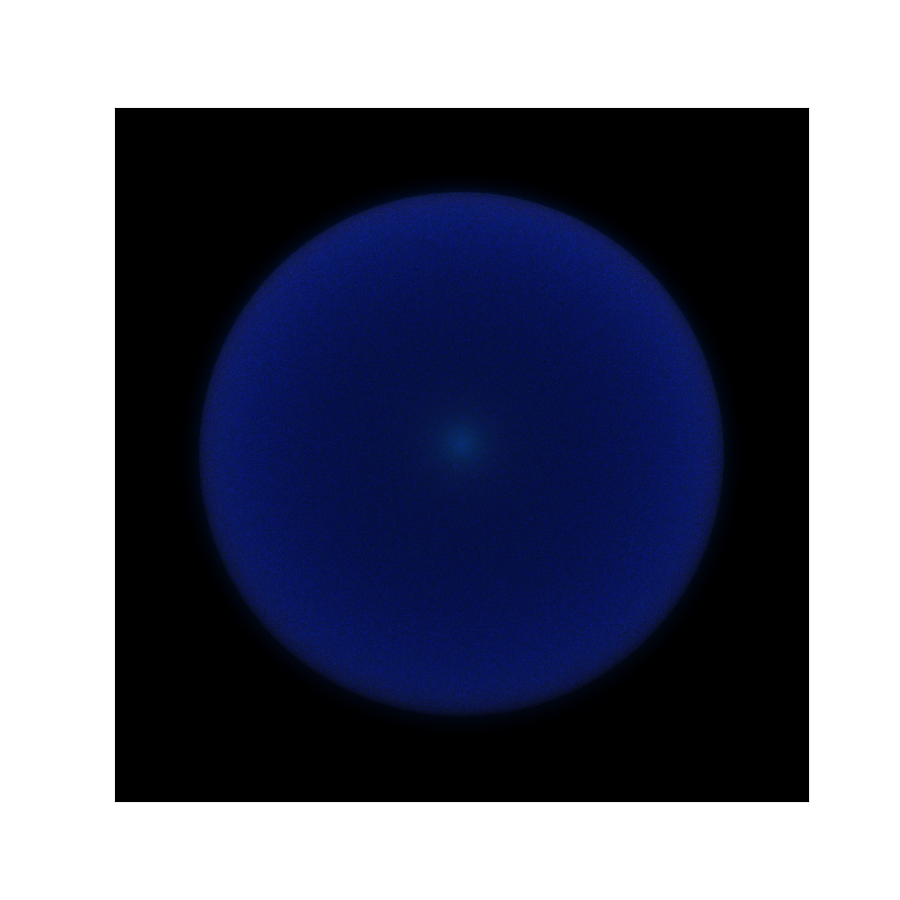

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

In [36]:
#Set the method:
method = "raw"
#options: raw (high = 1), tc2 (titancolor2), auto.
outname = "SpecSim" #First part of the output file names.

#Now that we have everything accessible, we need to generate the images.
#We make an image file out of all of these, then stitch the images together. 
#We keep the images so we can examine them individually, of course.
#Let's try to make use of making plots without showing them, eh?

fig, ax = plt.subplots(figsize = (xDim,yDim)) 

#We need to make an image for every degree.
k = 0
while(k < len(degOrder)):
    ax.clear()
    
    R = temp[k][7]
    G = temp[k][4]
    B = temp[k][2]
    
    if (method == "tc2"):
        R = R/(mod*1.12/16.)
        G = G/(mod*0.22)
        B = (B-0.03)/(mod*0.37)
    elif (method == "auto"):
        R = R/np.amax(R)
        G = G/np.amax(G)
        B = B/np.amax(B)
    #"Raw" does nothing at this step, it normalizes at the end.
    #Defualt sees no normalization occur. 
    
    #B's value can introduce negatives, remove them.
    i,j = 0,0
    for x in B:
        j=0
        for y in x:
            if (y < 0):
                B[i][j] = 0
            j = j+1
        i = i+1     
    
    colorData = [R,G,B] # arranged in cyx. I thought RGB needed to be transposed but evidentialy not. Hmm.
    colorData = np.transpose(colorData) #arranged in xyc
    if (method == "raw"):
        colorData = 2.*colorData/np.amax(temp)
        
    ax.set(xticks=[], yticks=[], title="") 
    image = ax.imshow(colorData, origin="lower") 
    #origin set since we've transposed one too many times.
    
    plt.savefig(outname + degOrder[k] + ".tif", format="tif", bbox_inches='tight', pad_inches = 0)
    k = k+1

plt.show()






<IPython.core.display.Javascript object>


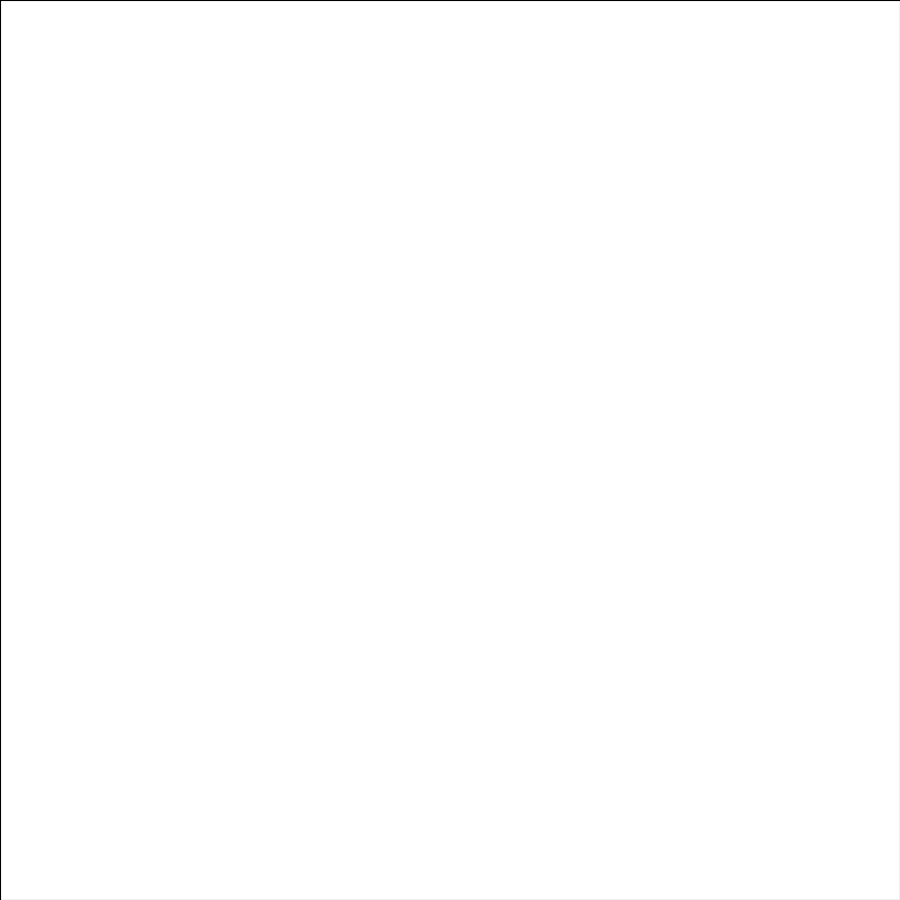

In [37]:
%matplotlib notebook
#And now animate it!
fig, ax = plt.subplots(figsize = (9,9)) 
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
import scipy.misc
from scipy import ndimage

imginitPath = r"C:\Users\deran\Desktop\GMsNotes\SCRATCH WORK\SpecSim"
imgend = r".tif"

img=mpimg.imread(imginitPath + degOrder[0] + imgend)
rimg = ndimage.rotate(img,90)

vid = ax.imshow(rimg, aspect='auto')

ax.axis('off')

def update(frame):
    ax.clear()
    img = mpimg.imread(imginitPath + degOrder[frame] + imgend)
    rimg = ndimage.rotate(img, 90)
    vid = ax.imshow(rimg, aspect='auto')
    ax.axis('off')
    
ani = animation.FuncAnimation(fig, update, frames=len(degOrder), interval=100)

#Saving the animation can take a while, disable as needed.
writer = animation.FFMpegFileWriter(fps = 4)
ani.save('SpecSimMOV.mp4', writer = writer)

plt.show()

<IPython.core.display.Javascript object>


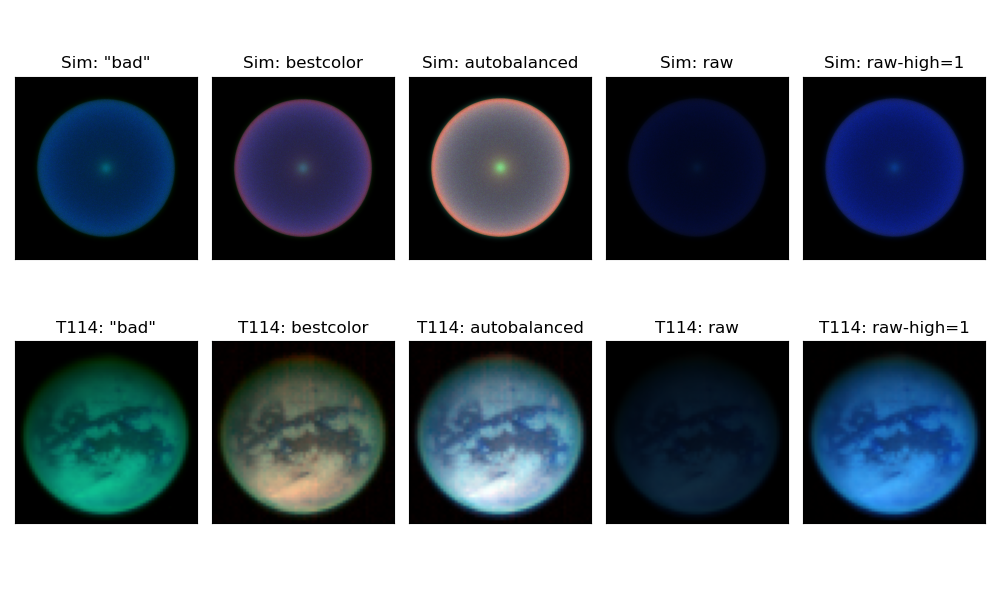

In [19]:
#Okay we need to demonstrate the issue. So...
fig, axs = plt.subplots(2,5,figsize = (10,6)) 

temp1 = np.transpose(dataStorage1)
temp2 = np.transpose(dataStorage2)
temp3 = np.transpose(dataStorage3)

mod = 1.

# set R, G, and B
R1 = temp1[0]/(mod*1.12) 
G1 = temp2[0]/(mod*0.22)
B1 = (temp3[0]-0.03)/(mod*0.37)

R2 = temp1[0]/(mod*1.12/16.) 
G2 = temp2[0]/(mod*0.22)
B2 = (temp3[0]-0.03)/(mod*0.37)

R3 = temp1[0]
G3 = temp2[0]
B3 = temp3[0]
maximum = np.amax(R3)
R3 = R3/maximum
maximum = np.amax(G3)
G3 = G3/maximum
maximum = np.amax(B3)
B3 = B3/maximum

R7 = temp1[0]
G7 = temp2[0]
B7 = temp3[0]

#These will be scaled in a post-processing step of the colorData itself. 
R8 = temp1[0]
G8 = temp2[0]
B8 = temp3[0]

#B's value can introduce negatives, remove them.
i,j = 0,0
for x in B1:
    j=0
    for y in x:
        if (y < 0):
            B1[i][j] = 0
        j = j+1
    i = i+1
i,j = 0,0
for x in B2:
    j=0
    for y in x:
        if (y < 0):
            B2[i][j] = 0
        j = j+1
    i = i+1

colorData1 = [R1,G1,B1] # arranged in cyx. I thought RGB needed to be transposed but evidentialy not. Hmm.
colorData1 = np.transpose(colorData1) #arranged in xyc
colorData2 = [R2,G2,B2] # arranged in cyx. I thought RGB needed to be transposed but evidentialy not. Hmm.
colorData2 = np.transpose(colorData2) #arranged in xyc
colorData3 = [R3,G3,B3] # arranged in cyx. I thought RGB needed to be transposed but evidentialy not. Hmm.
colorData3 = np.transpose(colorData3) #arranged in xyc

colorData7 = [R7,G7,B7] # arranged in cyx. I thought RGB needed to be transposed but evidentialy not. Hmm.
colorData7 = np.transpose(colorData7) #arranged in xyc
colorData8 = [R8,G8,B8] # arranged in cyx. I thought RGB needed to be transposed but evidentialy not. Hmm.
colorData8 = np.transpose(colorData8) #arranged in xyc
colorData8 = colorData8 / (np.amax(colorData8))

temp = np.transpose(dataStorage)

#Now compare to the real image.
ave = (temp[336]+temp[337]+temp[338]+temp[339]+temp[340]+temp[341]
      +temp[342]+temp[343]+temp[344]+temp[345]+temp[346]+temp[347]
      +temp[348]+temp[349]+temp[350]+temp[351])/16.

# set R, G, and B

mod = 1.
R4 = ave/(mod*1.12)
G4 = temp[165]/(mod*0.22)
B4 = (temp[120]-0.03)/(mod*0.37)

R5 = ave/(mod*1.12/16.)
G5 = temp[165]/(mod*0.22)
B5 = (temp[120]-0.03)/(mod*0.37)

R6 = ave
G6 = temp[165]
B6 = temp[120]
maximum = np.amax(R6)
R6 = R6/maximum
maximum = np.amax(G6)
G6 = G6/maximum
maximum = np.amax(B6)
B6 = B6/maximum

R9 = ave
G9 = temp[165]
B9 = temp[120]

#This one will be scaled manually later. 
R0 = ave
G0 = temp[165]
B0 = temp[120]

#B's value can introduce negatives, remove them.
i,j = 0,0
for x in B4:
    j=0
    for y in x:
        if (y < 0):
            B4[i][j] = 0
        j = j+1
    i = i+1
i,j = 0,0
for x in B5:
    j=0
    for y in x:
        if (y < 0):
            B5[i][j] = 0
        j = j+1
    i = i+1

# Now we need to combine them in the correct form: xyc, that is, x, y, then color value. 
colorData4 = [R4,G4,B4] # arranged in cyx. I thought RGB needed to be transposed but evidentialy not. Hmm.
colorData4 = np.transpose(colorData4) #arranged in xyc
colorData5 = [R5,G5,B5] # arranged in cyx. I thought RGB needed to be transposed but evidentialy not. Hmm.
colorData5 = np.transpose(colorData5) #arranged in xyc
colorData6 = [R6,G6,B6] # arranged in cyx. I thought RGB needed to be transposed but evidentialy not. Hmm.
colorData6 = np.transpose(colorData6) #arranged in xyc

colorData9 = [R9,G9,B9] # arranged in cyx. I thought RGB needed to be transposed but evidentialy not. Hmm.
colorData9 = np.transpose(colorData9) #arranged in xyc
colorData0 = [R0,G0,B0] # arranged in cyx. I thought RGB needed to be transposed but evidentialy not. Hmm.
colorData0 = np.transpose(colorData0) #arranged in xyc
colorData0 = colorData0 / (np.amax(colorData0))

image1 = axs[0,0].imshow(colorData1, origin="lower") #origin set since we've transposed one too many times.
axs[0,0].set(xticks=[], yticks=[], title = 'Sim: \"bad\"') 

image2 = axs[0,1].imshow(colorData2, origin="lower") #origin set since we've transposed one too many times.
axs[0,1].set(xticks=[], yticks=[], title = 'Sim: bestcolor') 

image3 = axs[0,2].imshow(colorData3, origin="lower") #origin set since we've transposed one too many times.
axs[0,2].set(xticks=[], yticks=[], title = 'Sim: autobalanced') 

image4 = axs[1,0].imshow(colorData4, origin="lower") #origin set since we've transposed one too many times.
axs[1,0].set(xticks=[], yticks=[], title = 'T114: \"bad\"') 

image5 = axs[1,1].imshow(colorData5, origin="lower") #origin set since we've transposed one too many times.
axs[1,1].set(xticks=[], yticks=[], title = 'T114: bestcolor') 

image6 = axs[1,2].imshow(colorData6, origin="lower") #origin set since we've transposed one too many times.
axs[1,2].set(xticks=[], yticks=[], title = 'T114: autobalanced') 

image7 = axs[0,3].imshow(colorData7, origin="lower") #origin set since we've transposed one too many times.
axs[0,3].set(xticks=[], yticks=[], title = 'Sim: raw') 

image8 = axs[0,4].imshow(colorData8, origin="lower") #origin set since we've transposed one too many times.
axs[0,4].set(xticks=[], yticks=[], title = 'Sim: raw-high=1') 

image9 = axs[1,3].imshow(colorData9, origin="lower") #origin set since we've transposed one too many times.
axs[1,3].set(xticks=[], yticks=[], title = 'T114: raw') 

image0 = axs[1,4].imshow(colorData0, origin="lower") #origin set since we've transposed one too many times.
axs[1,4].set(xticks=[], yticks=[], title = 'T114: raw-high=1') 

fig.tight_layout()

plt.show()

Bestcolor:

$$ R = \frac{R}{(1.12/16)}; G = \frac{G}{0.22}; B = \frac{B-0.03}{0.37} $$

"Bad":

$$ R = \frac{R}{1.12}; G = \frac{G}{0.22}; B = \frac{B-0.03}{0.37} $$

Autobalanced:

$$ R = \frac{R}{max(R)}; G = \frac{G}{max(G)}; B = \frac{B}{max(B)} $$